# This notebook presents a simulation of a pool of Renshaw cells (RC) with a current injected (iInjected) in their soma.

In [11]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [12]:
conf = Configuration('confInjectedCurrentRenshawCellPool.rmto')
conf.simDuration_ms = 500 # Here I change simulation duration without changing the Configuration file.

In [13]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [14]:
pools = []
pools.append(InterneuronPool(conf, 'RC'))

Syn = SynapsesFactory(conf, pools)



Interneuron Pool of RC built
Synaptic Noise on RC built
All the 350 synapses were built


In [5]:
# The simulation  itself

tic = time.clock()
for i in xrange(0,len(t)-1):
    # Here you can change the injected current in the Resnhaw cell during the simulation
    for j in pools[0].unit:
        j.iInjected = 5
    pools[1].atualizePool(t[i])    
    pools[0].atualizeInterneuronPool(t[i])
    membPotential[i] = pools[0].unit[175].v_mV # This command records the membrane potential of the RC with index 175.
toc = time.clock()
print str(toc - tic) + ' seconds'

550.850124 seconds


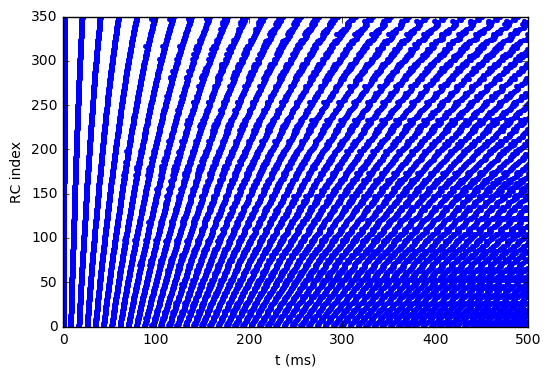

In [6]:
pools[0].listSpikes()

plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

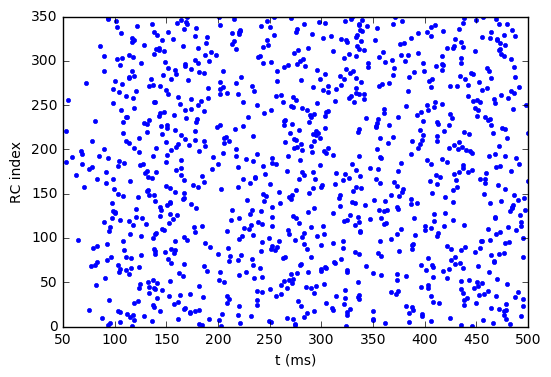

In [7]:
pools[1].listSpikes()

plt.plot(pools[1].poolTerminalSpikes[:, 0],
    pools[1].poolTerminalSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

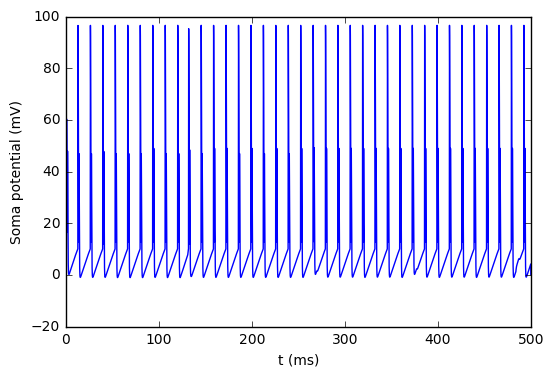

In [8]:
plt.figure()

plt.plot(t, membPotential, '-')

plt.xlabel('t (ms)')
plt.ylabel('Soma potential (mV)')

plt.show()

In [9]:
ISI = np.array([])
for i in xrange(0,len(pools[1].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[1].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
print ISI

[  86.85  121.05  121.15   90.7    90.3   160.3    92.85  208.05  125.55
  139.75  105.3   146.35  133.55  113.7   157.05   82.3   148.6   106.8
  287.25  111.1    78.05  178.85  157.8   168.8   103.65  165.15   96.1
  101.9   105.6   151.75   91.45  193.8   113.55   98.4    67.35  151.6
   74.05  172.75  148.75  184.3   107.1   128.75   78.1    89.75  160.8
  144.25  142.45  153.45  250.05   60.2   100.85  114.    100.9   200.55
  165.3   156.45  204.85  185.75  145.3   247.    154.45  142.85  200.6
  125.95  158.85  182.1   117.35  150.05  152.6   103.2   150.8    62.05
  105.55  172.65  116.85   88.05  111.     85.8   159.9   143.8   124.35
  123.4   136.2    87.3   177.05  111.55  184.45  152.35  157.25  143.25
  136.65  152.4   110.8   113.5   156.05  178.9   142.25  177.25  177.
  130.85  183.35   73.15  129.75  115.3   110.5   171.5   131.85  174.5
  171.9   197.5   143.8   186.75  165.2   216.55  137.05  157.15  102.
  113.7    73.9    85.15  175.1   123.15   97.7   110.9   117

(array([  14.,   69.,  148.,  170.,  149.,   87.,   36.,   14.,   11.,    3.]),
 array([  40.4  ,   65.445,   90.49 ,  115.535,  140.58 ,  165.625,
         190.67 ,  215.715,  240.76 ,  265.805,  290.85 ]),
 <a list of 10 Patch objects>)

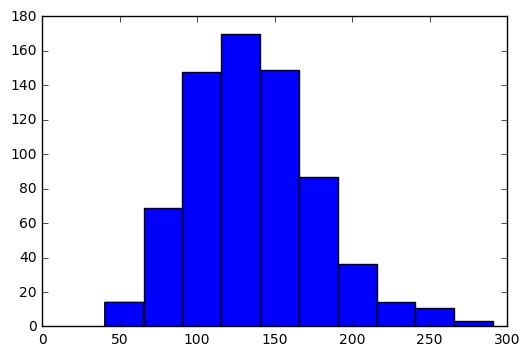

In [10]:
plt.figure()
plt.hist(ISI)